<a href="https://colab.research.google.com/github/arinaholubtsova/ADMP/blob/main/admp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.impute import KNNImputer

**Завдання 1**

In [ ]:
df = pd.read_csv('winequality-red_mod.csv')
df

,fixed acidity;citric acid;residual sugar;total sulfur dioxide;density;pH;alcohol;quality
0,7.4;0.0;1.9;34.0;;3.51;9.4;5
1,7.8;0.0;2.6;67.0;0.9968;3.2;9.8;5
2,7.8;0.04;2.3;54.0;;;9.8;5
3,11.2;0.56;1.9;60.0;;3.16;9.8;6
4,7.4;0.0;1.9;34.0;;;9.4;5
...,...
1594,6.2;0.08;2.0;44.0;;3.45;10.5;5
1595,5.9;0.1;2.2;51.0;0.99512;;11.2;6
1596,6.3;0.13;2.3;40.0;0.99574;3.42;11.0;6
1597,5.9;0.12;2.0;44.0;0.99547;3.57;10.2;5


**Завдання 2**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   fixed acidity;citric acid;residual sugar;total sulfur dioxide;density;pH;alcohol;quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB


In [ ]:
df.describe()

,fixed acidity;citric acid;residual sugar;total sulfur dioxide;density;pH;alcohol;quality
count,1599
unique,1554
top,13.2;0.52;2.2;35.0;;3.1;9.0;6
freq,2


**Завдання 3**

KeyError: ignored

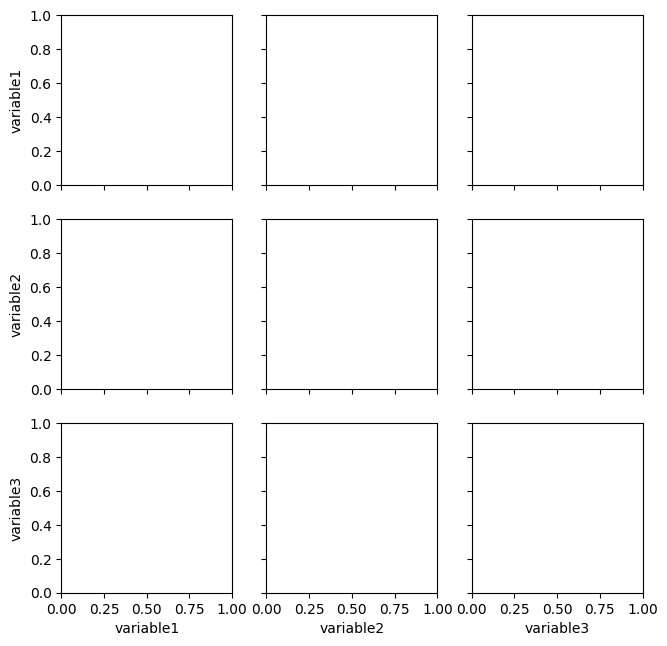

In [ ]:
sns.pairplot(df, hue='quality', vars=['variable1', 'variable2', 'variable3'])


**Завдання 4**

In [ ]:
df_dropna_rows = df.dropna()

df_dropna_rows.info()
df_dropna_rows.describe()

**Завдання 5**

In [ ]:
df_dropna_cols_rows = df.dropna(axis=1, thresh=int(0.25 * len(df)))\
                      .dropna()

**Завдання 6**

In [ ]:
df_dropna_cols_rows.info()
df_dropna_cols_rows.describe()

**Завдання 7**

In [ ]:
df_simple_imp = df.copy()
df_simple_imp['volatile acidity'].fillna(inplace = True, value=df_simple_imp['volatile acidity'].median())

**Завдання 8**

In [ ]:
df_simple_imp.fillna(value=df_simple_imp.mean(), inplace=True)
df_simple_imp.info()

In [ ]:
df_simple_imp.describe()

In [ ]:
df_simple_imp.mean()

**Завдання 9**

In [ ]:
nan_mask = df[['volatile acidity', 'free sulfur dioxide']].isna().any(axis=1)
sns.scatterplot(df_simple_imp, x = 'volatile acidity', y = 'free sulfur dioxide', hue=nan_mask);

nan_mask = df[['pH', 'alcohol']].isna().any(axis=1)
sns.scatterplot(df_simple_imp, x = 'pH', y = 'alcohol', hue=nan_mask);

**Завдання 10**

In [ ]:
sns.histplot(data=df, x='volatile acidity', kde=True, binwidth=0.1, binrange=(0, 2))
plt.show()

sns.histplot(data=df_simple_imp, x='volatile acidity', kde=True, binwidth=0.1, binrange=(0, 2))
plt.show()

sns.histplot(data=df, x='citric acid', kde=True, binwidth=0.1, binrange=(0, 2))
plt.show()

sns.histplot(data=df_simple_imp, x='citric acid', kde=True, binwidth=0.1, binrange=(0, 2))
plt.show()

**Завдання 11**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("quality", axis=1))
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])
X_scaled_df.describe()

**Завдання 12**

In [ ]:
imputer = KNNImputer(n_neighbors=3)

X_scaled_imp = imputer.fit_transform(X_scaled)

**Завдання 13**

In [ ]:
X_imp = scaler.inverse_transform(X_scaled_imp)

**Завдання 14**

In [ ]:
df_kNN_imp = df.copy()

imputer = KNNImputer(n_neighbors=3)
X_scaled_imp = imputer.fit_transform(X_scaled)

X_imp = scaler.inverse_transform(X_scaled_imp)

df_kNN_imp.iloc[:, :-1] = X_imp

df_kNN_imp.info()
df_kNN_imp.describe()

**Завдання 15**

In [ ]:
nan_mask = df[['volatile acidity', 'free sulfur dioxide']].isna().any(axis=1)
sns.scatterplot(df_kNN_imp, x = 'volatile acidity', y = 'free sulfur dioxide', hue=nan_mask);

nan_mask = df[['pH', 'alcohol']].isna().any(axis=1)
sns.scatterplot(df_kNN_imp, x = 'pH', y = 'alcohol', hue=nan_mask);